# **Explanatory Data Analysis (EDA) for Survey eChannel, eCommerce, eLifestyle & Fraud/Penipuan Digital**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/ITB/Tools Probstat/Tubes

/content/drive/MyDrive/ITB/Tools Probstat/Tubes


In [2]:
import pandas as pd

In [3]:
file_path = "18222035.xlsx"
df = pd.read_excel(file_path)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Columns: 150 entries, Jenis Kelamin to keluhan_belanja_online_6
dtypes: int64(1), object(149)
memory usage: 332.9+ KB


In [5]:
df.head()

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_5,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6
0,Pria,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Tidak,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,menggunakan fitur Paylater,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
1,Pria,20,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,600%,Ya,Streaming video/ film,Mobile Banking,...,Transfer via ATM,NaN,Melalui minimarket,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Wanita,53,D3,Karyawan Swasta,> Rp 10 juta,Jakarta,200%,Ya,Akses media sosial,NaN,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN
3,Pria,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,NaN,Ya,Game online,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wanita,23,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Jakarta,NaN,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,Jumlah barang yang diterima kurang,NaN,NaN


## **Description**

Melakukan EDA terhadap hasil kuisioner untuk mendapatkan gambaran umum tentang dataset, menganalisis karakteristik atribut, dan menghasilkan insight dari data.

## **Table of Contents**

- [Description](https://colab.research.google.com/drive/1-rjmFaGKFRtaSAR6RyfnNlhXuJQ_TB7Q#scrollTo=L1Xiv2-1tfOP&line=3&uniqifier=1)
- [Data Cleaning](https://colab.research.google.com/drive/1-rjmFaGKFRtaSAR6RyfnNlhXuJQ_TB7Q#scrollTo=QHSuEJ82Be3F&line=1&uniqifier=1)
- [Function](https://colab.research.google.com/drive/1-rjmFaGKFRtaSAR6RyfnNlhXuJQ_TB7Q#scrollTo=vHN6BkqaHW29&line=3&uniqifier=1)
- [Preliminary EDA](https://colab.research.google.com/drive/1-rjmFaGKFRtaSAR6RyfnNlhXuJQ_TB7Q#scrollTo=LfSaEL5NYXdf&line=1&uniqifier=1)
- [Univariate EDA](https://colab.research.google.com/drive/1-rjmFaGKFRtaSAR6RyfnNlhXuJQ_TB7Q#scrollTo=5n4N8kE_VkFT&line=1&uniqifier=1)
- [Bivariate EDA](https://colab.research.google.com/drive/1-rjmFaGKFRtaSAR6RyfnNlhXuJQ_TB7Q#scrollTo=E5z6RahqwNbF&line=1&uniqifier=1)



## **Data Cleaning**


### Memastikan kolom Usia memiliki nilai yang masuk akal

In [9]:
top_10_ages = df.nlargest(10, 'Usia')['Usia']
print(top_10_ages)

188    1994
235    1976
264    1971
173      64
198      60
20       59
65       59
179      59
16       57
48       57
Name: Usia, dtype: int64


Berdasarkan observasi, terdapat 3 kesalahan input usia menjadi tahun lahir. Ubah menjadi usia dengan mengasumsikan tahun survey adalah 2022.

In [10]:
current_year = 2022

to_correct = [188, 235, 264]
birth_years = [df.loc[index, 'Usia'] for index in to_correct]

correct_ages = [current_year - birth_year for birth_year in birth_years]

df.loc[to_correct, 'Usia'] = correct_ages


In [11]:
# corrected datas
print(df.loc[to_correct, 'Usia'])

188    28
235    46
264    51
Name: Usia, dtype: int64


### Menyeragamkan data Pendidikan Terakhir

In [18]:
pendidikan_freq = get_unique_values_and_frequencies(df, 'Pendidikan Terakhir')

pendidikan_freq

,value,frequency
0,SMA,131
1,S1,112
2,S2,17
3,D3,16
4,D4,4
5,S3,1
6,Profesi,1
7,Sekolah,1
8,S1 + Profesi,1


Dari data, terdapat beberapa outlier yang dapat digabung dengan kelompok lain. Misalnya,
- "Sekolah" dapat digabung dengan "SMA"
- "S1 + Profesi" dan "Profesi" dapat digabung dengan "S1" dengan asumsi bahwa pendidikan profesi adalah pendidikan yang harus diambil tamatan jurusan tertentu untuk mendapat sertifikasi profesi.

In [19]:
df["Pendidikan Terakhir"].replace({
    "Profesi": "S1",
    "S1 + Profesi": "S1",
    "Sekolah": "SMA"
}, inplace=True)


In [20]:
pendidikan_freq = get_unique_values_and_frequencies(df, 'Pendidikan Terakhir')

pendidikan_freq

,value,frequency
0,SMA,132
1,S1,114
2,S2,17
3,D3,16
4,D4,4
5,S3,1


## **Function**



In [14]:
def get_unique_values_and_frequencies(df, column_name):
    """
    Returns a DataFrame showing unique values and their frequencies in a specified column.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to analyze.

    Returns:
        pd.DataFrame: A DataFrame with two columns: 'value' and 'frequency'.
    """

    unique_values = df[column_name].unique()
    frequencies = df[column_name].value_counts().reset_index(name='frequency')
    frequencies.columns = ['value', 'frequency']

    return frequencies

In [15]:
def get_unique_values_and_frequencies_for_matching_columns(df, column_name_prefix):
    """
    Returns a DataFrame with unique values and frequencies for all columns starting with a given prefix.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column_name_prefix (str): The prefix to search for in column names.

    Returns:
        pd.DataFrame: A DataFrame with columns 'column', 'value', and 'frequency'.
    """

    results = []

    for column in df.columns:
        if column.startswith(column_name_prefix):
            frequencies = df[column].value_counts().reset_index(name='frequency')
            frequencies['column'] = column
            results.append(frequencies)

    return pd.concat(results, ignore_index=True)

In [16]:
def filter_and_get_data(df, column1, value1, column2):
    """
    Filters a DataFrame based on a value in column1 and returns data from specific columns.

    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column1 (str): The name of the column to filter on.
        value1 (str): The value to filter for in column1.
        column2 (str): The name of the column to include in the output DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing data for the filtered rows.
    """

    filtered_df = df[df[column1] == value1]

    if filtered_df.empty:
        print(f"No data found for value '{value1}' in column '{column1}'.")
        return pd.DataFrame()
    else:
        # Include additional columns if needed
        # filtered_df = filtered_df[[column2, ...other_columns...]]
        return filtered_df[[column2]]

In [17]:
def get_no_answer_df(df, columnstart):
    """
    Return dataframe that doesn't answer any of column starting with "columnstart"

    Args:
        df (pd.DataFrame): Input dataframe
        columnstart (str): Prefix of column names to filter

    Returns:
        pd.DataFrame: Dataframe with no answer
    """

    matching_columns = [col for col in df.columns if col.startswith(columnstart)]
    return df[df[matching_columns].isna().all(axis=1)]

## **Preliminary EDA**

In [21]:
n_row = df.shape[0]
n_column = df.shape[1]
print(df.shape)

(284, 150)


In [62]:
# list all attributes
attributes = df.transpose()

attributes = attributes.reset_index()
attributes = attributes.rename(columns={'index': 'attribute'})
attributes = attributes.drop(attributes.columns[1:], axis=1)

# list all missing values
missing_values = []
for i in range(df.shape[1]):
    missing_values.append(df.iloc[:, i].isnull().sum())
attributes['missing_values'] = missing_values

### **Conclusion**

Ukuran sampel dataset adalah 284 data.

Jumlah atribut dataset adalah 150.

Jumlah missing value per atribut adalah sebagai berikut:

In [ ]:
for index, row in attributes.iterrows():
    print(row['attribute'], ":", row['missing_values'])

Jenis Kelamin : 0
Usia : 0
Pendidikan Terakhir : 0
Pekerjaan : 0
Penghasilan per Bulan : 0
Domisili : 0
Durasi Penggunaan Internet per Hari (dalam Jam) : 78
Aktivitas Online Meningkat : 0
Aktivitas yang Meningkat dalam 3 Bulan Terakhir : 114
layanan_aktif_1 : 42
layanan_aktif_2 : 106
layanan_aktif_3 : 257
layanan_aktif_4 : 228
layanan_aktif_5 : 259
layanan_aktif_6 : 269
bank_1 : 223
bank_2 : 201
bank_3 : 131
bank_4 : 270
bank_5 : 226
bank_6 : 277
bank_7 : 272
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM] : 37
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Internet Banking ] : 171
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ] : 34
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [SMS Banking] : 215
18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Datang ke cabang bank] : 197
19. Manakah channel/ layanan yang lebih Anda sukai ketika Anda akan menggunakan fitur-fitur layanan perbankan berikut? [Cek Saldo ] : 35
19. 

**Catatan**: Beberapa atribut merupakan hasil dari multiple choice

## **Visualisasi Data**

In [23]:
import matplotlib.pyplot as plt

### Pie Chart Proporsi Jenis Kelamin Responden

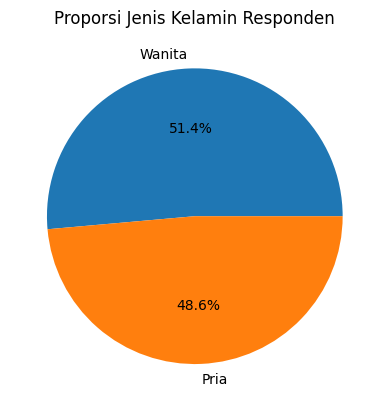

In [24]:
jenis_kelamin = df["Jenis Kelamin"]

gender_counts = jenis_kelamin.value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Proporsi Jenis Kelamin Responden")
plt.show()

Diperoleh proporsi wanita sebesar 51.4% dan pria sebesar 48.6%. Proporsi ini cukup seimbang, menunjukkan bahwa data yang diperoleh tidak bias antara salah satu gender.

### Histogram Distribusi Usia Responden

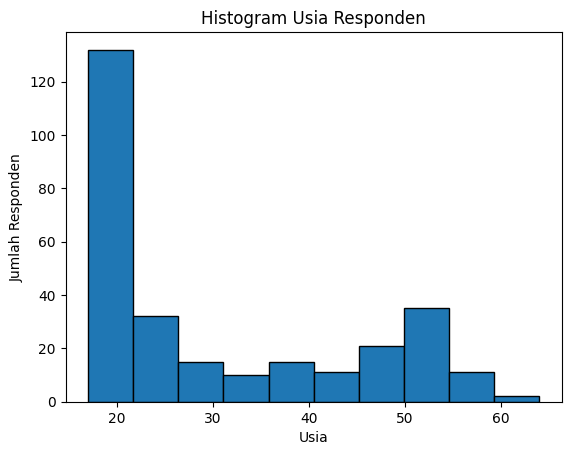

In [25]:
usia = df["Usia"]

plt.hist(usia, bins=10, edgecolor="black")
plt.xlabel("Usia")
plt.ylabel("Jumlah Responden")
plt.title("Histogram Usia Responden")
plt.show()

Distribusi usia responden tampak tidak simetris dengan kecenderungan lebih banyak responden yang berusia muda dibandingkan usia tua. Sebagian besar responden terkonsentrasi pada rentang usia 20-an dan 30-an.

Kelompok usia dengan jumlah responden terbanyak adalah sekitar awal 20-an. Kelompok usia ini umum menjadi target utama pemasaran online karena mereka aktif berbelanja dan menggunakan internet.

### Bar Chart Distribusi Pendidikan Terakhir Responden

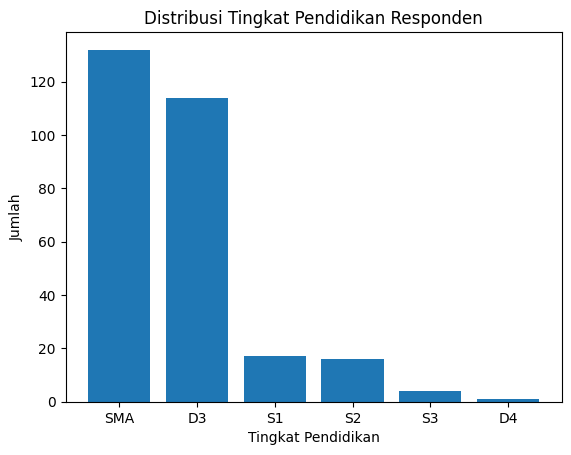

In [26]:
education_level = df["Pendidikan Terakhir"]

plt.bar(education_level.unique(), education_level.value_counts())

plt.xlabel("Tingkat Pendidikan")
plt.ylabel("Jumlah")
plt.title("Distribusi Tingkat Pendidikan Responden")

plt.show()

Diperoleh mayoritas responden memiliki tingkat pendidikan terakhir SMA, diikuti dengan D3 lalu S1. Data ini menunjukkan mayoritas responden masih belum mencapai tingkat perguruan tinggi. Persentase ini cukup tertinggal dari tingkat pendidikan negara-negara maju.

### Violin Plot Penghasilan per Bulan Responden Berdasarkan Usia dan Jenis Kelamin

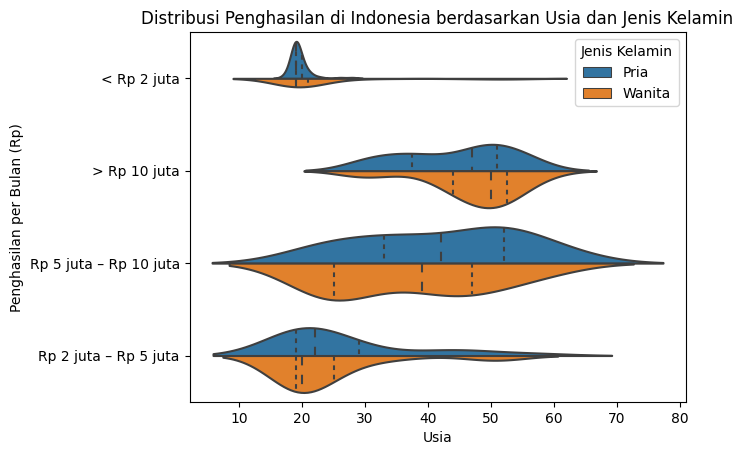

In [28]:
import seaborn as sns

sns.violinplot(x="Usia", y="Penghasilan per Bulan", hue="Jenis Kelamin", data=df, split=True, inner="quart")

plt.xlabel("Usia")
plt.ylabel("Penghasilan per Bulan (Rp)")
plt.title("Distribusi Penghasilan di Indonesia berdasarkan Usia dan Jenis Kelamin")
plt.legend(title="Jenis Kelamin")

plt.show()

Responden pada rentang usia awal 20-an cenderung memiliki penghasilan <5 juta untuk pria dan wanita. Pada rentang usia lain, penghasilan responden umumnya berada pada rentang 5-10 juta. Terdapat lebih banyak wanita dengan penghasilan >10 juta dibandingkann pria dalam kategori serupa. Kebanyakan pria dan wanita dengan penghasilan >10 juta berada pada rentang umur mendekati 50-60.

### Horizontal Bar Chart Distribusi Pekerjaan

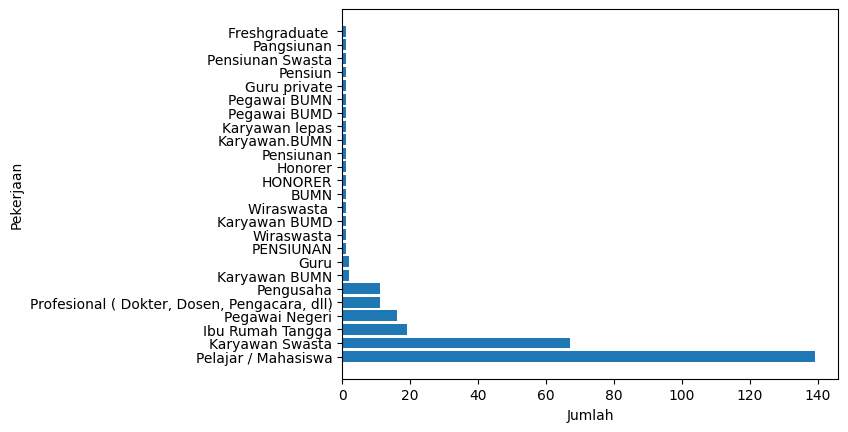

In [29]:
job_distribution = df["Pekerjaan"].value_counts()

plt.barh(job_distribution.index, job_distribution.values)

plt.xlabel("Jumlah")
plt.ylabel("Pekerjaan")

plt.show()

Mayoritas responden merupakan Pelajar/Mahasiswa, diikuti dengan Karyawan Swasta dan Pegawai Negeri. Hal ini sesuai dengan rentang usia responden yang mayoritas berusia awal 20-an.

### Scatter Plot Aktivitas Online Meningkat dan Usia

<ipython-input-30-28360e75fe96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aom["Aktivitas Online Meningkat"] = aom["Aktivitas Online Meningkat"].replace({


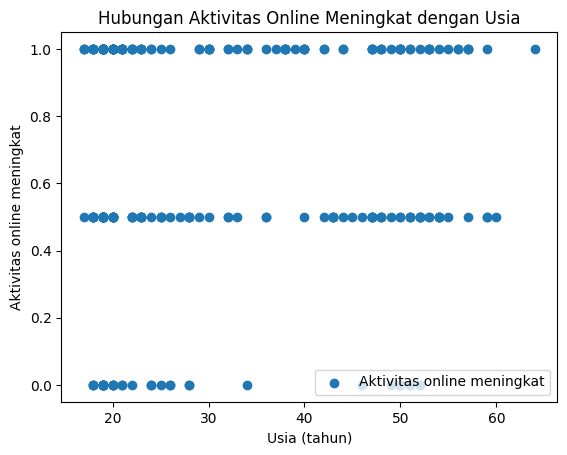

In [30]:
aom = df[["Aktivitas Online Meningkat", "Usia"]]

aom["Aktivitas Online Meningkat"] = aom["Aktivitas Online Meningkat"].replace({
    "Ya": 1,
    "Tidak": 0,
    "Sama saja": 0.5
})

plt.scatter(aom["Usia"], aom["Aktivitas Online Meningkat"], label="Aktivitas online meningkat")
plt.xlabel("Usia (tahun)")
plt.ylabel("Aktivitas online meningkat")
plt.title("Hubungan Aktivitas Online Meningkat dengan Usia")
plt.legend()
plt.show()


Diperoleh aktivitas online meningkat lebih padat pada rentang usia awal 20-an. Sementara itu, pada usia 50-an, tren cenderung meningkat atau sama saja. Lebih sedikit responden yang cenderung mengurangi aktivitas online.

## **Univariate EDA**

In [33]:
import numpy as np
import scipy.stats as stats

### Confidence Interval 95% for One-Sample Proportion


---

#### Proporsi responden Pria dalam keseluruhan responden

- Atribut: Jenis Kelamin
- Jumlah data: 284
- Jumlah missing values: 0

In [31]:
prop = (df['Jenis Kelamin'] == 'Pria').sum() / len(df)
print("proportion:", prop)

proportion: 0.4859154929577465


In [34]:
alpha = 0.05
n = len(df)
z = stats.norm.ppf(1 - alpha / 2)

mor = z * np.sqrt(prop * (1 - prop) / n)

lower_bound = prop - mor
upper_bound = prop + mor

print("margin of error:", mor)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)

margin of error: 0.058128156802420484
lower bound: 0.427787336155326
upper bound: 0.544043649760167


#### **Insight**
Berdasarkan confidence interval 95%, proporsi responden pria dalam dataset ini adalah antara 42.8% dan 54.4% dengan margin of error 0.06.

Berdasarkan confidence interval 95%, proporsi responden pria dalam dataset ini adalah antara 42.8% dan 54.4% dengan margin of error 0.06.

Berdasarkan insight ini, kita dapat menyimpulkan bahwa proporsi responden pria dalam dataset ini kemungkinan besar berada di kisaran 42% hingga 54%. Margin of error sebesar 0,06 menunjukkan bahwa proporsi responden pria dalam dataset ini mungkin berbeda dari yang sebenarnya sebesar 0,06%.

Proporsi ini cukup seimbang, menandakan adanya keseimbangan gender dalam partisipasi survey ini. Keseimbangan data berkaitan dengan keakuratan data. Data yang seimbang cenderung lebih netral dalam merepresentasikan tren antara kedua gender. Kesimpulannya, data ini cukup baik untuk menganalisis tren dalam kedua gender.

#### Proporsi responden dengan aktivitas online meningkat

- Atribut: Aktivitas Online Meningkat
- Jumlah data: 284
- Jumlah missing values: 0

In [35]:
prop = (df['Aktivitas Online Meningkat'] == 'Ya').sum() / len(df)
print("proportion:", prop)

proportion: 0.4788732394366197


In [36]:
alpha = 0.05
n = len(df)
z = stats.norm.ppf(1 - alpha / 2)

mor = z * np.sqrt(prop * (1 - prop) / n)

lower_bound = prop - mor
upper_bound = prop + mor

print("margin of error:", mor)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)

margin of error: 0.058099299055121206
lower bound: 0.4207739403814985
upper bound: 0.5369725384917409


**Conclusion**

Berdasarkan confidence interval 95%, proporsi responden dengan aktivitas online meningkat adalah antara 42.1% dan 53.7% dengan margin of error 0.06.

#### Proporsi responden dengan aktivitas online menurun

- Atribut: Aktivitas Online Meningkat
- Jumlah data: 284
- Jumlah missing values: 0

In [37]:
prop = (df['Aktivitas Online Meningkat'] == 'Tidak').sum() / len(df)
print("proportion:", prop)

proportion: 0.13732394366197184


In [38]:
alpha = 0.05
n = len(df)
z = stats.norm.ppf(1 - alpha / 2)

mor = z * np.sqrt(prop * (1 - prop) / n)

lower_bound = prop - mor
upper_bound = prop + mor

print("margin of error:", mor)
print("lower bound:", lower_bound)
print("upper bound:", upper_bound)

margin of error: 0.040030031019738
lower bound: 0.09729391264223385
upper bound: 0.17735397468170983


**Conclusion**

Berdasarkan confidence interval 95%, proporsi responden dengan aktivitas online sama saja adalah antara 9.7% dan 17.7% dengan margin of error 0.04.

#### **Insight**

Berdasarkan data survey ini, proporsi responden dengan aktivitas online meningkat adalah antara 42.1% dan 53.7% dengan margin of error 0.06. Artinya, dengan tingkat kepercayaan yang tinggi, dapat dikatakan bahwa aktivitas online penduduk meningkat.

Hanya sebagian kecil dari penduduk yang mengalami penurunan aktivitas online, yaitu antara 9.7% dan 17.7% dengan margin of error 0.04. Tingkat kepercayaan data ini juga tinggi.

Ada beberapa faktor yang berkontribusi terhadap peningkatan aktivitas online di Indonesia. Salah satu faktornya adalah pandemi COVID-19 yang memaksa banyak orang untuk bekerja dan belajar dari rumah. Hal ini menyebabkan orang-orang lebih sering menggunakan internet untuk berbagai keperluan, seperti bekerja, belajar, dan bersosialisasi bahkan setelah pandemi berakhir.

### Z-Test for One-Sample Proportion dengan Alpha = 5%


---


#### Proporsi responden dengan layanan aktif mobile banking adalah 50%

**H0**: Proporsi responden dengan layanan aktif mobile banking adalah 50%

**H1**: Proporsi responden dengan layanan aktif mobile banking tidak sama dengan 50%

In [39]:
prop = (df['layanan_aktif_1'] == 'Mobile Banking').sum() / len(df)
print("proportion: ", prop)

proportion:  0.852112676056338


In [40]:
z = (prop - 0.5) / np.sqrt(0.5 * 0.5 / len(df))
print("z:", z)

z: 11.867816581938532


In [41]:
p = 2 * (1 - stats.norm.cdf(abs(z)))
print("p-value:", p)

p-value: 0.0


**Conclusion**

P-value (0.0) lebih kecil dari alpha (0.05), sehingga H0 ditolak. Kesimpulannya, proporsi responden dengan layanan aktif mobile banking tidak sama dengan 50%.



#### Proporsi responden dengan layanan aktif internet banking adalah 50%

**H0**: Proporsi responden dengan layanan aktif internet banking adalah 50%

**H1**: Proporsi responden dengan layanan aktif internet banking tidak sama dengan 50%

In [42]:
prop = (df['layanan_aktif_4'] == 'Internet Banking').sum() / len(df)
print("proportion: ", prop)

proportion:  0.19718309859154928


In [43]:
z = (prop - 0.5) / np.sqrt(0.5 * 0.5 / len(df))
print("z:", z)

z: -10.20632226046714


In [44]:
p = 2 * (1 - stats.norm.cdf(abs(z)))
print("p-value:", p)

p-value: 0.0


**Conclusion**

P-value lebih kecil dari alpha (0.05), sehingga H0 ditolak. Kesimpulannya, proporsi responden dengan layanan internet banking tidak sama dengan 50%.



#### **Insight**

Diperoleh penggunaan mobile banking dan internet banking sama-sama tidak sama dengan 50%, keduanya lebih condong ke angka maksimum ataua minimum.

Dari proporsi, diamati bahwa penggunaan mobile banking mendominasi, dengan angka mencapai 85%. Sementara itu, orang-orang mulai meninggalkan internet banking, tampak dari proporsi 20% pada penggunaan internet banking.

Internet banking lebih populer sebelum adanya mobile banking. Salah satu faktor penyebabnya adalah mobile banking mempermudah user untuk masuk ke akun mereka dan melakukan transaksi.

Belakangan ini banyak sekali modus penipuan yang menyasar aplikasi mobile banking pada gawai pengguna. Beberapa pengguna juga mulai kehilangan kepercayaan mereka terhadap bank-bank atau dompet online tertentu karena pemotongan saldo yang tidak diinginkan. Dengan maraknya penggunaan mobile bank, keamanan aplikasi mobile banking perlu ditingkatkan untuk meningkatkan kepercayaan dan kenyamanan pengguna.

#### Proporsi responden dengan layanan aktif ATM adalah 50%

**H0**: Proporsi responden dengan layanan aktif ATM adalah 50%

**H1**: Proporsi responden dengan layanan aktif ATM tidak sama dengan 50%

In [46]:
prop = (df['layanan_aktif_2'] == 'ATM').sum() / len(df)
print("proportion: ", prop)

proportion:  0.6267605633802817


In [47]:
z = (prop - 0.5) / np.sqrt(0.5 * 0.5 / len(df))
print("z:", z)

z: 4.272413969497873


In [48]:
p = 2 * (1 - stats.norm.cdf(abs(z)))
print("p-value:", p)

p-value: 1.9336816600823425e-05


**Conclusion**

P-value lebih kecil dari alpha (0.05), sehingga H0 ditolak. Kesimpulannya, proporsi responden dengan layanan ATM tidak sama dengan 50%.



#### **Insight**

Proporsi responden yang menggunakan layanan ATM tidak sama dengan 50%, artinya cenderung ke suatu arah dominan atau minoritas.

Dari proporsi diperoleh kecenderungan penggunaan ATM masih positif, pada tingkat 63%. Dapat disimpulkan bahwa layanan ATM masih relevan dan penyediaan ATM di berbagai lokasi masih menjadi kebutuhan masyarakat saat ini.

### Chi-Squared Test for Goodness-for-Fit Test dengan alpha = 5%

(H0: data distribution = uniform distribution)

---

In [49]:
from scipy.stats import chisquare

#### Atribut frequency bank memiliki distribusi uniform

- Asumsi: Atribut bank_1 hingga bank_7 dianggap sebagai bank yang digunakan responden
- Atribut: frequency (dari jumlah frekuensi masing-masing bank_1 hingga bank_7)

**H0**: Atribut frequency bank memiliki distribusi uniform

**H1**: Atribut frequency bank tidak memiliki distribusi uniform

In [50]:
no_bank_df = df[~df[['bank_1', 'bank_2', 'bank_3', 'bank_4', 'bank_5', 'bank_6', 'bank_7']].any(axis=1)]

# no_bank_df


In [51]:
prop = no_bank_df.shape[0] / n_row
print("proportion:", prop)

proportion: 0.08098591549295775


Jumlah responden yang tidak mengisi akun yang dimiliki sebanyak 23 (8% dari total responden). Persentase yang mengisi setidaknya salah satu bank cukup banyak sehingga distribusi akun bank yang dimiliki relatif representatf.

In [52]:
# create Bank

bank_data = df[[col for col in df.columns if col.startswith('bank_')]].stack().dropna()

Bank = bank_data.to_frame(name='bank_name').reset_index(drop=True).value_counts().rename_axis('bank_name').reset_index(name='frequency')

Bank

,bank_name,frequency
0,Bank BCA,153
1,Bank Mandiri,83
2,Bank BNI,61
3,Bank BRI,58
4,Bank CIMB Niaga,14
5,Bank Permata,12
6,Bank BTN,7


Seorang responden dapat memilih beberapa bank. Survey ini berfokus distribusi keseluruhan pilihan bank individu. Maka, frekuensi ekspektasi yang dipilih adalah jumlah keseluruhan data yang diperoleh.

In [33]:
observed_frequencies = Bank['frequency'].to_list()

n_banks = len(Bank)
expected_frequencies = [Bank['frequency'].sum() / n_banks] * n_banks

print("expected_frequencies:", expected_frequencies)

expected_frequencies: [55.42857142857143, 55.42857142857143, 55.42857142857143, 55.42857142857143, 55.42857142857143, 55.42857142857143, 55.42857142857143]


In [34]:
alpha = 0.05

chi_square_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

print("chi-squared statistic:", chi_square_statistic)
print("p-value:", p_value)

chi-squared statistic: 293.45360824742266
p-value: 2.0666509465524664e-60


#### **Insight**

P-value lebih kecil dari alpha (0.05), sehingga H0 ditolak. Hal ini menunjukkan bank tidak memiliki distribusi yang sesuai dengan distribusi uniform. Kesimpulannya, terdapat beberapa bank yang lebih populer daripada bank lainnya.

Bank yang paling populer adalah Bank BCA. Bank lain yang populer adalah Bank Mandiri, Bank BNI dan Bank BRI.

Karakteristik yang dimiliki dua bank paling populer antara lain adalah track record yang dapat dipercaya, kemudahan bertransasksi serta mengurus akun, aplikasi mobile dengan UI/UX yang baik, serta banyaknya lokasi cabang dan ATM.

Bank BNI dan BRI yang cukup populer berkarakteristik menyasar masyarakat menengah dengan biaya administrasi yang cenderung lebih murah. Bank-bank ini banyak digunakan karyawan untuk penyaluran gaji.

Dapat disimpulkan, karakteristik yang menyebabkan suatu bank populer adalah kemudahan transaksi dan mengurus akun serta promo yang ditawarkan.

#### Atribut pendidikan terakhir memiliki distribusi uniform

**H0**: Atribut pendidikan terakhir memiliki distribusi uniform

**H1**: Atribut pendidikan terakhir tidak memiliki distribusi uniform

In [209]:
pendidikan_freq

,value,frequency
0,SMA,132
1,S1,114
2,S2,17
3,D3,16
4,D4,4
5,S3,1


In [56]:
observed_frequencies = pendidikan_freq['frequency'].to_list()

expected_frequencies = n_row/6

print("expected_frequencies:", expected_frequencies)
print("observed_frequencies:", observed_frequencies)

expected_frequencies: 47.333333333333336
observed_frequencies: [132, 114, 17, 16, 4, 1]


In [57]:
alpha = 0.05

chi_square_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

print("chi-squared statistic:", chi_square_statistic)
print("p-value:", p_value)

chi-squared statistic: 370.5492957746477
p-value: 6.57418465288085e-78


#### **Insight**

P-value lebih kecil dari alpha (0.05), sehingga H0 ditolak. Hal ini menunjukkan tingkat pendidikan tidak memiliki distribusi yang sesuai dengan distribusi uniform.

Dari data, kebanyakan dari masyarakat masih berada pada jenjang pendidikan SMA. Namun, dari data pekerjaan yang divisualisasikan di awal analisa, terlihat banyak responden dengan pekerjaan mahasiswa/pelajar. Selain itu, kebanyakan responden berada pada rentang umur 20-an.

Dapat disimpulkan bahwa masyarakat dengan rentang umur ini mendominasi penggunaan internet. Strategi bisnis online dapat disesuaikan untuk menyasar kriteria orang-orang dengan usia 20-an dengan budget atau kebutuhan pelajar/mahasiswa.

## **Bivariate EDA**

### Confidence Interval 95% for Two-Sample Proportion Difference


---

### Z-Test for Proportion Difference dengan alpha = 5%


---

**Catatan**: Keduanya dilakukan sekaligus

In [81]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

#### Perbedaan proporsi jenis kelamin dan alasan memakai e-money karena promo

In [104]:
count = df.groupby('Jenis Kelamin')['alasan_pakai_emoney_3'].apply(lambda x: (x == 'Promo').sum())
nobs = df['Jenis Kelamin'].value_counts()

stat, pval = proportions_ztest(count=count, nobs=nobs)
confint = proportion_confint(count=count, nobs=nobs, alpha=0.05)

In [105]:
print("proporsi")
print(count/nobs)
print()

print("z: ", stat)
print()

print(confint)

print("p-value: ", pval)
print()

proporsi
Pria      0.463768
Wanita    0.500000
dtype: float64

z:  -1.527654069029986

(Jenis Kelamin
Pria      0.357871
Wanita    0.445704
dtype: float64, Jenis Kelamin
Pria      0.518841
Wanita    0.612267
dtype: float64)
p-value:  0.12659844966976902



**Conclusion**

Berdasarkan confidence interval 95% proporsi antara pria dan wanita dan kecenderungan memakai ecommerce karena promo adalah 35%-51% untuk pria dan 44%-61% untuk wanita.

P-value > alpha sehingga hipotesis perbedaan proporsi gagal ditolak.

#### Perbedaan proporsi jenis kelamin dan alasan memakai e-money karena simple

In [106]:
count = df.groupby('Jenis Kelamin')['alasan_pakai_emoney_1'].apply(lambda x: (x == 'Simple').sum())
nobs = df['Jenis Kelamin'].value_counts()

stat, pval = proportions_ztest(count=count, nobs=nobs)
confint = proportion_confint(count=count, nobs=nobs, alpha=0.05)

In [107]:
print("proporsi")
print(count/nobs)
print()

print("z: ", stat)
print()

print(confint)

print("p-value: ", pval)
print()

proporsi
Pria      0.717391
Wanita    0.726027
dtype: float64

z:  -1.6923492975664405

(Jenis Kelamin
Pria      0.602297
Wanita    0.697702
dtype: float64, Jenis Kelamin
Pria      0.753868
Wanita    0.838530
dtype: float64)
p-value:  0.0905793935524205



**Conclusion**

Berdasarkan confidence interval 95% proporsi antara pria dan wanita dan kecenderungan memakai ecommerce karena promo adalah 60%-75% untuk pria dan 75%-83% untuk wanita.

P-value > alpha sehingga hipotesis perbedaan proporsi = 0 gagal ditolak.

#### Perbedaan proporsi jenis kelamin dan alasan memakai e-money karena aman

In [108]:
count = df.groupby('Jenis Kelamin')['alasan_pakai_emoney_5'].apply(lambda x: (x == 'Aman').sum())
nobs = df['Jenis Kelamin'].value_counts()

stat, pval = proportions_ztest(count=count, nobs=nobs)
confint = proportion_confint(count=count, nobs=nobs, alpha=0.05)

In [110]:
print("proporsi")
print(count/nobs)
print()

print("z: ", stat)
print()

print(confint)

print("p-value: ", pval)
print()

proporsi
Pria      0.275362
Wanita    0.267123
dtype: float64

z:  -0.4231800420584511

(Jenis Kelamin
Pria      0.189100
Wanita    0.207485
dtype: float64, Jenis Kelamin
Pria      0.331448
Wanita    0.357733
dtype: float64)
p-value:  0.6721639069825153



**Conclusion**

Berdasarkan confidence interval 95% proporsi antara pria dan wanita dan kecenderungan memakai ecommerce karena promo adalah 18%-33% untuk pria dan 20%-35% untuk wanita.

P-value > alpha sehingga hipotesis perbedaan proporsi = 0 gagal ditolak.

In [22]:
from statsmodels.stats.proportion import proportions_ztest

#### Z-Test Proportion untuk Aktivitas Online Meningkat dan Jenis Kelamin

In [32]:
df_filtered = df[df["Aktivitas Online Meningkat"] == "Ya"]

male_count = df_filtered[df_filtered["Jenis Kelamin"] == "Pria"].shape[0]
female_count = df_filtered[df_filtered["Jenis Kelamin"] == "Wanita"].shape[0]
total_count = df_filtered.shape[0]

male_prop = male_count / total_count
female_prop = female_count / total_count

In [23]:
z_stat, p_value = proportions_ztest([male_count, female_count], [total_count, total_count])

print("z-statistic:", z_stat)
print("p-value:", p_value)

z-statistic: 0.2425356250363321
p-value: 0.808365155914511


**Conclusion**

P-value (0.88) lebih besar dari alpha (0.05), sehingga H0 gagal ditolak.
Kesimpulannya, tidak ada cukup bukti untuk membantah selisih proporsi pria dengan aktivitas online meningkat dan proporsi wanita dengan aktivitas online meningkat adalah 0.



### Chi-Squared Test for Independence


---


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

#### Frekuensi penggunaan mobile banking homogen pada setiap rentang penghasilan per bulan

Atribut:
- Penghasilan per Bulan
  - Jumlah missing values: 0
- Frekuensi Penggunaan Channel Bank Mobile Banking
  - Jumlah missing values: 34

**H0**: Frekuensi penggunaan mobile banking homogen pada setiap rentang penghasilan per bulan

**H1**: Frekuensi penggunaan mobile banking tidak homogen pada setiap rentang penghasilan per bulan

In [60]:
weights = {
    '>10 kali per bulan': 4,
    '6-9 kali per bulan': 3,
    '2-5 kali per bulan': 2,
    'Kurang dari/setidaknya 1 kali per bulan': 1,
    'Tidak pernah': 0,
    np.nan: 0
}

In [61]:
# map frequency using weights
df['mobile_banking_score'] = df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]'].map(weights)

In [62]:
contingency_table = pd.crosstab(df['Penghasilan per Bulan'], df['mobile_banking_score'])

In [63]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)

print(f'chi-squared test statistic: {chi2}')
print(f'p-value: {pval}')

chi-squared test statistic: 12.031589759070782
p-value: 0.06126777475212697


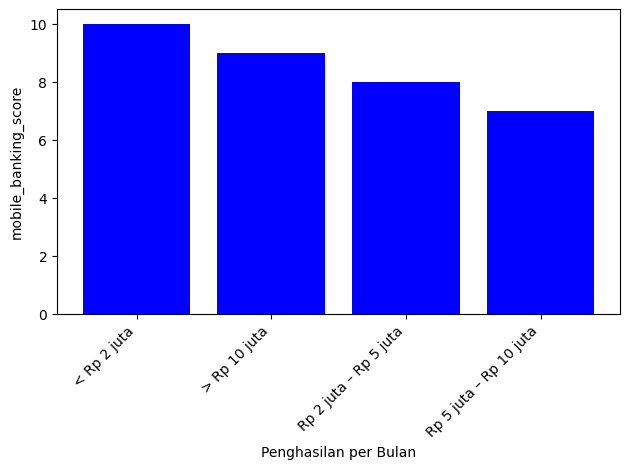

In [64]:
plt.bar(contingency_table.index, contingency_table.values[:, 0], color='b')  # Pilih kolom pertama
plt.xticks(rotation=45, ha='right')
plt.xlabel('Penghasilan per Bulan')
plt.ylabel('mobile_banking_score')
plt.tight_layout()
plt.show()

#### **Insight**

P-value (0.06) lebih besar dari alpha (0.05), sehingga H0 gagal ditolak. Hal ini menunjukkan tidak ada cukup bukti untuk menyimpulkan adanya frekuensi penggunaan mobile banking homogen pada setiap rentang penghasilan per bulan

Dalam kasus ini, p-value sebesar 0.06 menunjukkan bahwa ada kemungkinan 6% bahwa homogenitas antara rentang penghasilan dan frekuensi penggunaan mobile banking terjadi secara kebetulan. Ini berarti bahwa hubungan tersebut mungkin ada, tetapi mungkin juga tidak.

Untuk menarik kesimpulan yang lebih kuat, kita dapat meningkatkan ukuran sampel atau menggunakan uji statistik yang lebih kuat.

Jika dilihat dari visualisasi data, penggunnaan mobile banking cenderung berbanding terbalik dengan banyak gaji per bulan. Namun, skor penggunaan mobile banking masih tergolong tinggi pada rentang >7. Oleh karena itu, dapat disimpulkan layanan mobile banking relevan dan sering digunakan oleh semua lapisan masyarakat.

#### Distribusi pendidikan terakhir homogen pada kedua jenis kelamin

Atribut:
- Pendidikan terakhir
  - Jumlah missing values: 0
- Jenis kelamin
  - Jumlah missing values: 0

**H0**: Distribusi pendidikan terakhir homogen pada kedua jenis kelamin

**H1**: Distribusi pendidikan terakhir tidak homogen pada kedua jenis kelamin

In [66]:
contingency_table = pd.crosstab(df['Pendidikan Terakhir'], df['Jenis Kelamin'])

In [67]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)

print(f'chi-squared test statistic: {chi2}')
print(f'p-value: {pval}')

chi-squared test statistic: 8.992004392190536
p-value: 0.10938350115086388


**Conclusion**

P-value (0.11) lebih besar dari alpha (0.05), sehingga H0 gagal ditolak. Hal ini menunjukkan tidak ada cukup bukti untuk menyimpulkan homogenitas antara tingkat pendidikan di antara dua jenis kelamin.

### Chi-Squared Test for Homogenity


---



In [92]:
from scipy.stats import chi2_contingency

In [106]:
no_ecom_df = get_no_answer_df(df, 'ecommerce_pilihan_')

no_ecom_df[['Usia', 'tempat_belanja_online_1']]

,Usia,tempat_belanja_online_1
48,57,Marketplace (seperti Lazada
102,50,NaN
123,52,NaN
264,51,NaN


Dari responden yang tidak memilih e-commerce sama sekali, hanya satu yang menyatakan berbelanja online di marketplace. Perhatikan bahwa usia semua responden tersebut di atas 50 sehingga kemungkinan mereka tidak menggunakan sarana marketplace/ecommerce.

Data e-commerce pilihan dianggap valid untuk dianalisa karena cukup lengkap.

In [98]:
cols = ["ecommerce_pilihan_1", "ecommerce_pilihan_2", "ecommerce_pilihan_3", "ecommerce_pilihan_4", "keluhan_belanja_online_1", "keluhan_belanja_online_2", "keluhan_belanja_online_3", "keluhan_belanja_online_4", "keluhan_belanja_online_5", "keluhan_belanja_online_6"]
ecom = df[cols]
ecom = ecom.dropna()

In [108]:
contingency_table = pd.crosstab(df["ecommerce_pilihan_1"], df["keluhan_belanja_online_1"])

In [110]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi-squared value:", chi2)
print("p-value:", p)

chi-squared value: 0.0
p-value: 1.0


**Conclusion**

P-value = 1 menunjukkan bahwa terdapat homogenitas antara atribut yang diuji.

## **Lainnya**

### Menganalisis Kecenderungan Berbelanja Online untuk Berbagai Produk



In [191]:
for i in range(97, 108):
    col = df.columns[i]

    online_freq = get_unique_values_and_frequencies(df, col)

    print(col)
    print(online_freq)
    print()

47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode]
                                    value  frequency
0  offline/ langsung datang ke toko fisik         93
1                                  online         91

47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [groceries / keperluan sehari- hari]
                                    value  frequency
0  offline/ langsung datang ke toko fisik        143
1                                  online         50

47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [handphone]
                                    value  frequency
0  offline/ langsung datang ke toko fisik        145
1                                  online         39

47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [laptop/computer]
                                    value  frequency
0  offline/ langsung datang ke toko fisik        153
1                                  online     

### **Insight**

Kecenderungan berbelanja sekarang sudah mulai bergeser ke berbelanja online untuk berbagai produk, terutama kosmetik, buku & hobi, pulsa, makanan & minuman, tiket pesawat, dan tiket bioskop.

Kecenderungan ini berasal dari kemudahan dalam berbelanja barang-barang tersebut online. Buktinya dapat dilihat dari data alasan seseorang memilih berbelanja online.

Jika diperhatikan, produk-produk tersebut tersedia pada banyak e-commerce. E-commerce dianggap sebagai sarana jual beli online yang dapat dipercaya. Oleh karena itu, untuk meningkatkan penjualan barang-barang tersebut, sebaiknya seorang penjual menjajakan barangnya di berbagai e-commerce.

### **Insight**

Namun, untuk beberapa barang seperti groceries, handphone, laptop, dan alat elektronik, orang-orang masih cenderung berbelanja offline.

Jika diperhatikan, kebanyakan barang ini adalah barang-barang yang relatif mahal.

Rendahnya tingkat berbelanja online untuk barang-barang mahal menunjukkan masih ada resiko yang terlalu 'mahal' dikorbankan dibandingkan berbelanja offline.

Jika seseorang berbelanja offline, dia perlu waktu untuk pergi ke toko, kemudian mencari di beberapa toko untuk membandingkan harga. Namun, pengorbanan itu dinilai masih lebih 'murah' atau 'aman' dibandingkan resiko berbelanja online.

Keluhan berbelanja online yang relevan dengan situasi ini antara lain, barang rusak, barang salah, barang yang diperoleh tidak sesuai dengan promosi.

Jika ingin lebih banyak orang berbelanja barang-barang elektronik secara online, keamanan dan garansi barang selama pengiriman harus dijamin serta perlu ada verifikasi spesifikasi yang dapat memastikan barang sesuai.

Problem kedua dapat ditindaklanjuti dengan memberikan verifikasi store atau verifikasi per barang jualan. Namun, problem keamanan selama pengiriman masih sulit dijamin karena berkaitan dengan banyak faktor eksternal.

### **Insight**

Selain barang yang relatif mahal, barang yang diperlukan fresh juga cenderung dibeli secara offline, misalnya grocery.

Beberapa orang ingin memilih sendiri barang belanjaannya, seperti buah yang manis, sayur yang masih hijau, atau ikan yang baru sampai di pasar.

Kendala dari sistem belanja online selama ini adalah tidak ada jaminan bahwa agen yang memilih dan membawa pesanan ahli dalam memilih bahan-bahan yang bagus.

Ada peluang untuk mengembangkan bisnis layanan belanja online dengan jaminan agen yang ditugaskan ahli dalam memilih bahan makanan yang bagus.

Alternatif lain untuk pilihan belanja ini adalah membuka toko online yang menjamin kualitas barang yang dijual. Toko online ini biasa dikenal dengan toko dengan kualitas premium.

In [47]:
contingency_table = pd.crosstab(df['Usia'], df['mobile_banking_score'])

In [48]:
chi2, pval, dof, expected = chi2_contingency(contingency_table)

print(f'chi-squared test statistic: {chi2}')
print(f'p-value: {pval}')

chi-squared test statistic: 73.07887519055338
p-value: 0.1196679308499407


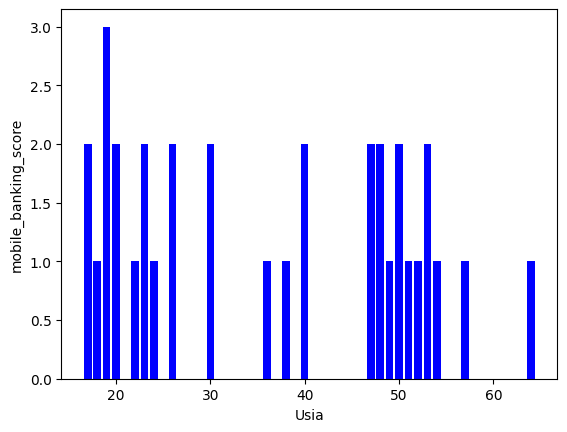

In [49]:
plt.bar(contingency_table.index, contingency_table.values[:, 0], color='b')  # Pilih kolom pertama
plt.xlabel('Usia')
plt.ylabel('mobile_banking_score')
plt.show()

### Analisis channel bank paling populer

In [117]:
no_channel_df = get_no_answer_df(df, "18. Bagaimana frekuensi penggunaan Channel Bank berikut? ")

print("missing values:", no_channel_df.shape[0])
print("proportion:", no_channel_df.shape[0]/n_row)

missing values: 2
proportion: 0.007042253521126761


Jumlah responden yang tidak mengisi channel bank sama sekali adalah 2 orang (0.007%). Data yang tersedia cenderung valid dan memadai untuk melakukan analisis.

In [118]:
weights = {
    '>10 kali per bulan': 4,
    '6-9 kali per bulan': 3,
    '2-5 kali per bulan': 2,
    'Kurang dari/setidaknya 1 kali per bulan': 1,
    'Tidak pernah': 0
}

In [125]:
channel_scores = {}
for col in df.filter(like='18. Bagaimana frekuensi penggunaan Channel Bank berikut?'):
    weighted_frequencies = df[col].map(weights)
    channel_scores[col.replace('18. Bagaimana frekuensi penggunaan Channel Bank berikut? ', '')] = weighted_frequencies.sum()


In [126]:
most_used_channel = max(channel_scores, key=channel_scores.get)
print(f'Channel bank yang paling banyak digunakan adalah: {most_used_channel}')

Channel bank yang paling banyak digunakan adalah: [ATM]


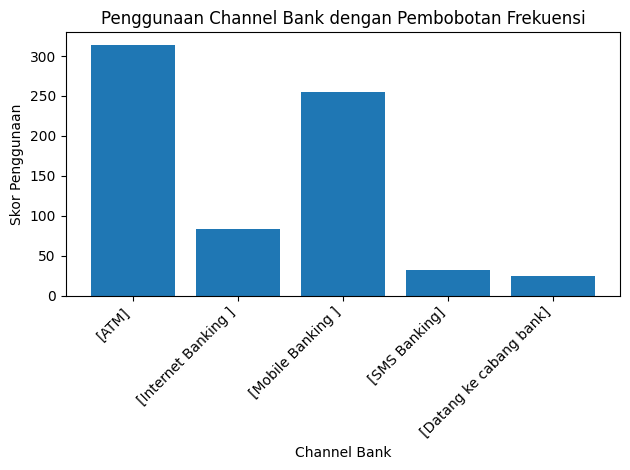

In [128]:
plt.bar(channel_scores.keys(), channel_scores.values())

plt.xticks(rotation=45, ha='right')

plt.xlabel('Channel Bank')
plt.ylabel('Skor Penggunaan')
plt.title('Penggunaan Channel Bank dengan Pembobotan Frekuensi')
plt.tight_layout()
plt.show()

In [124]:
df['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM]']

0      > 10 kali per bulan
1       2-5 kali per bulan
2       6-9 kali per bulan
3       2-5 kali per bulan
4       2-5 kali per bulan
              ...         
279    > 10 kali per bulan
280    > 10 kali per bulan
281     2-5 kali per bulan
282     6-9 kali per bulan
283     2-5 kali per bulan
Name: 18. Bagaimana frekuensi penggunaan Channel Bank berikut? [ATM], Length: 284, dtype: object

### Menganalisis penggunaan e-money paling populer

In [82]:
no_guna_emoney_df = df[~df[['penggunaan_emoney_1', 'penggunaan_emoney_2', 'penggunaan_emoney_3', 'penggunaan_emoney_4', 'penggunaan_emoney_5', 'penggunaan_emoney_6', 'penggunaan_emoney_7', 'penggunaan_emoney_8', 'penggunaan_emoney_9', 'penggunaan_emoney_10']].any(axis=1)]

no_guna_emoney_df.shape[0]

21

In [80]:
# create Guna_Emoney

guna_emoney_data = df[[col for col in df.columns if col.startswith('penggunaan_emoney_')]].stack().dropna()

Guna_Emoney = guna_emoney_data.to_frame(name='penggunaan').reset_index(drop=True).value_counts().rename_axis('penggunaan').reset_index(name='frequency')

Guna_Emoney

,penggunaan,frequency
0,Pembelian delivery makanan,201
1,Pembayaran transportasi online,176
2,Pembayaran e-commerce,175
3,Pembayaran di restauran/ cafe,133
4,Pembayaran tol,132
5,Pembelian pulsa,131
6,Pembayaran di minimarket,124
7,Pembayaran tiket parkir,108
8,Pembayaran transportasi umum,88
9,Pembayaran utilitas (PLN,64


### Menganalisis peningkatan belanja online dalam 6 bulan terakhir yang paling populer

In [77]:
# create Kecenderungan
kecenderungan_data = df[[col for col in df.columns if col.startswith('45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?')]].stack().dropna()
Kecenderungan = kecenderungan_data.to_frame(name='kecenderungan').reset_index(drop=True).value_counts().rename_axis('kecenderungan').reset_index(name='frequency')

nan_row = pd.DataFrame({'kecenderungan': ['nan'], 'frequency': [1]})
Kecenderungan = Kecenderungan.append(nan_row, ignore_index=True)

Kecenderungan

<ipython-input-77-4814c5380213>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Kecenderungan = Kecenderungan.append(nan_row, ignore_index=True)


,kecenderungan,frequency
0,Tetap,131
1,Meningkat,92
2,Menurun,60
3,nan,1


In [79]:
no_meningkat_df = df[~df[['belanja_online_meningkat_6bln_terakhir_1', 'belanja_online_meningkat_6bln_terakhir_2', 'belanja_online_meningkat_6bln_terakhir_3', 'belanja_online_meningkat_6bln_terakhir_4', 'belanja_online_meningkat_6bln_terakhir_5', 'belanja_online_meningkat_6bln_terakhir_6', 'belanja_online_meningkat_6bln_terakhir_7', 'belanja_online_meningkat_6bln_terakhir_8', 'belanja_online_meningkat_6bln_terakhir_9', 'belanja_online_meningkat_6bln_terakhir_10']].any(axis=1)]

no_meningkat_df.shape[0]

153

In [54]:
# create Meningkat

meningkat_data = df[[col for col in df.columns if col.startswith('belanja_online_meningkat_6bln_terakhir_')]].stack().dropna()

Meningkat = meningkat_data.to_frame(name='meningkat').reset_index(drop=True).value_counts().rename_axis('meningkat').reset_index(name='frequency')

Meningkat

,meningkat,frequency
0,Membeli makanan dan minuman secara online,96
1,Belanja fashion & mode secara online,69
2,Pembelian pulsa secara online,62
3,Belanja buku,41
4,Booking transportasi jarak jauh kereta api/ pe...,40
5,Belanja groceries / keperluan sehari-hari seca...,39
6,Belanja kosmetik & alat kecantikan/ perawatan ...,39
7,Booking Hotel secara online,25
8,Belanja handphone,12
9,laptop/ komputer secara online,12
